In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [18]:
def seg(image):
    img = image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    
    #visualize the output result
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(image)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(markers)
    plt.title('Marker Image After Segmentation'), plt.xticks([]), plt.yticks([])
    plt.show()
    return img

In [24]:
def canny(img):
    figure_size = 15
    edges = cv2.Canny(img,150,600)
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img1)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

`Watershed On a Benign Cytology Image`

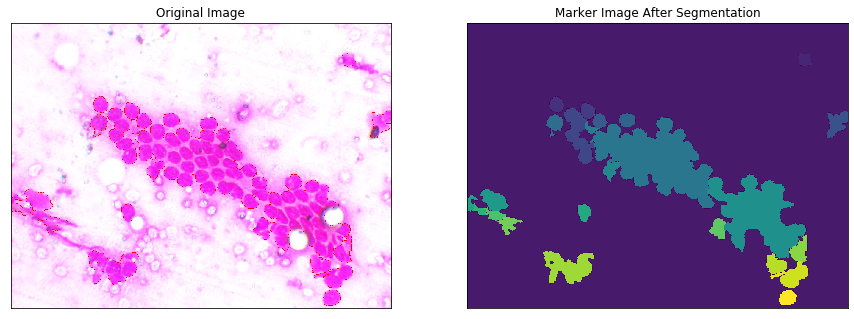

In [19]:
img1= cv2.imread("img_rgb/B10A.jpg")
res1= seg(img1)

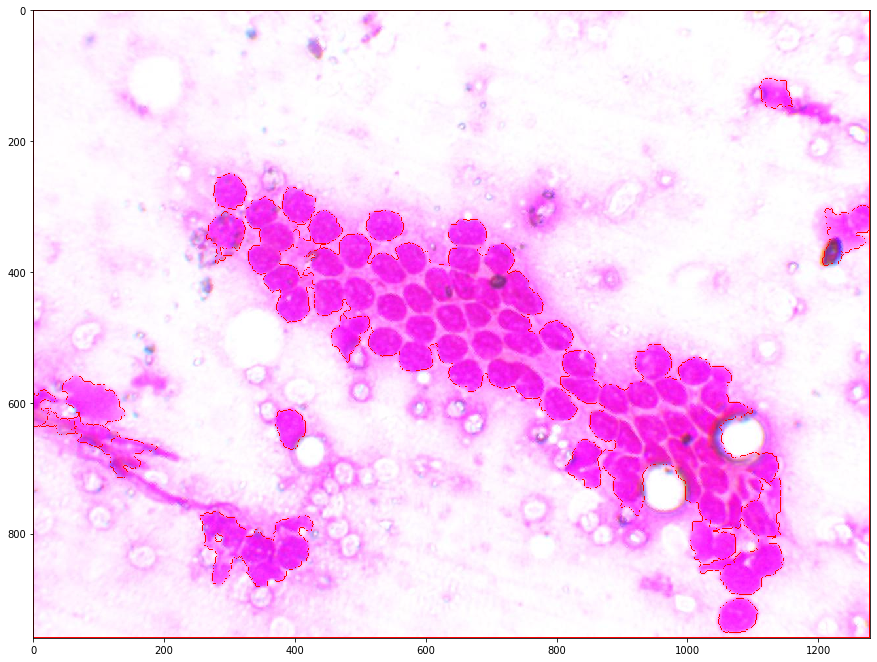

In [21]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(res1)

`Running Canny Edge Detection on result`

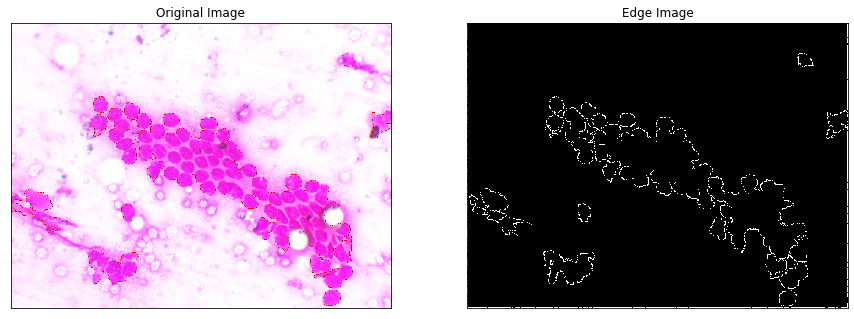

In [25]:
canny(res1)

`Watershed On a Malignant Cytology Image`

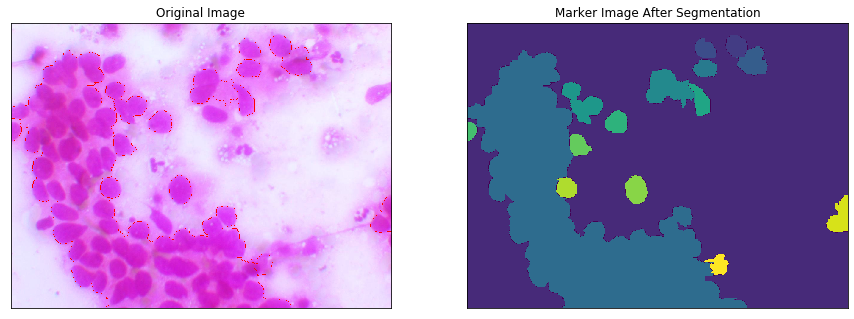

In [26]:
img1= cv2.imread("img_rgb/M53D.jpg")
res1= seg(img1)

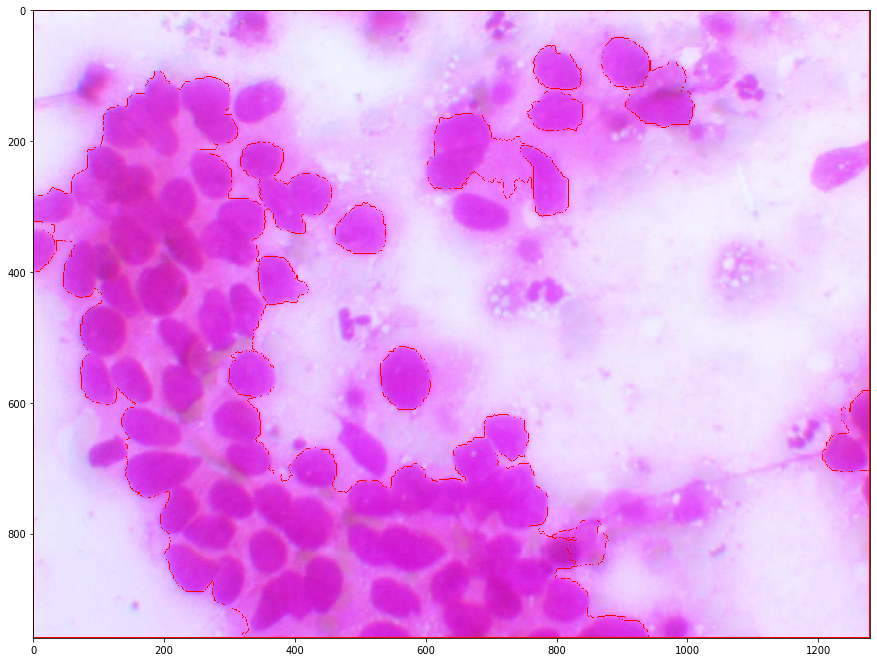

In [27]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(res1)

`Running Canny Edge Detection on result`

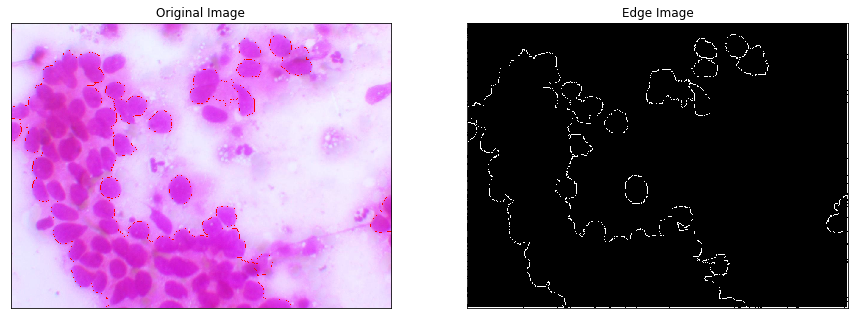

In [28]:
canny(res1)